## Linear Regression - Regression  - Supervised Learning

using data from here: https://raw.githubusercontent.com/mdogy/dataForEng1999/master/superconductor.csv

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
df3 = pd.read_csv("https://raw.githubusercontent.com/mdogy/dataForEng1999/master/superconductor.csv")

In [22]:
#summary statistics
df3.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


## Reformat the data

In [23]:
X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

In [24]:
print(X.shape)
print(y.shape)

(21263, 81)
(21263,)


## Perform a Train/Test split


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

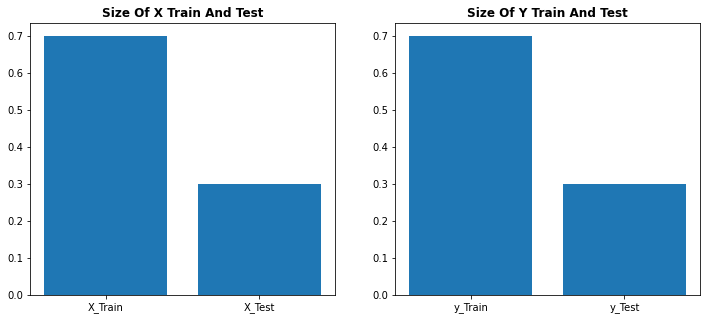

In [26]:
#sanity check on train and test split
fig, ax = plt.subplots(ncols =2, figsize = (12,5))

ax[0].bar(height = np.array([len(X_train), len(X_test)])/np.sum(len(X_train)+len(X_test)),
        x = ['X_Train', "X_Test"]
       )
ax[0].set_title("Size of X train and test".title(), fontweight = 'bold')


ax[1].bar(height = np.array([len(y_train), len(y_test)])/np.sum(len(y_train)+len(y_test)),
        x = ['y_Train', "y_Test"]
       )
ax[1].set_title("Size of y train and test".title(), fontweight = 'bold')

plt.show()

## Perform a linear regression on first variable (first input column) against the target. Scatter plot.

In [27]:
from sklearn.linear_model import LinearRegression

In [39]:
# create object for the class
lr = LinearRegression()

#subset the first input column for the linear reg model
X_train_1_col = X_train.iloc[:,0].to_numpy().reshape(-1,1)

# perform linear regression on 1st input col
lr.fit(X_train_1_col,y_train)

#print the accuracy score of the training set
acc_score_train = lr.score(X_train_1_col,y_train)
print("Accuracy Score of training set is %.2f%%" %acc_score_train)

# predict
pred_regression_line_train = lr.predict(X_train_1_col)


Accuracy Score of training set is 0.37%


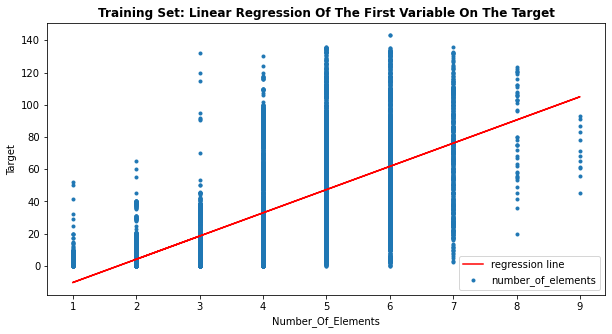

In [40]:
plt.figure(figsize = (10,5))
#scatterplot the first cols vs y 
plt.scatter(X_train_1_col, y_train, marker='.', label = "number_of_elements") #the first input col is  number_of_elements

#plot also the fitted line
plt.plot(X_train_1_col, pred_regression_line_train,'r-', label = "regression line")
plt.legend(loc = "lower right")
plt.ylabel("Target")
plt.xlabel("number_of_elements".title())
plt.title("Training set: Linear Regression of the first variable on the target".title(), fontweight = 'bold')
plt.show()

## Scatter Plot prediction

Show a scatter plot of predicted value of y (from only 1 input variable) vs the actual value, for the test split only.

In [41]:
#subset the first input column for the linear reg model
X_test_1_col = X_test.iloc[:,0].to_numpy().reshape(-1,1)

# predict on test
pred_regression_line_test = lr.predict(X_test_1_col)

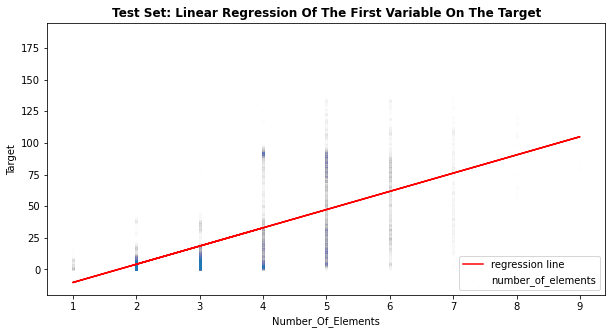

In [42]:
plt.figure(figsize = (10,5))

#scatterplot the first cols vs y 
plt.scatter(X_test_1_col, y_test, marker='.', label = "number_of_elements", alpha = 0.003) #the first input col is  number_of_elements

#plot also the fitted line
plt.plot(X_test_1_col, pred_regression_line_test,'r-', label = "regression line")
plt.legend(loc = "lower right")
plt.ylabel("Target")
plt.xlabel("number_of_elements".title())
plt.title("Test Set: Linear Regression of the first variable on the target".title(), fontweight = 'bold')
plt.show()

## Report mean square error and R^2

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
mse = mean_squared_error(y_test, pred_regression_line_test)
print("The mean square error is: %.2f"%mse)

r2 = r2_score(y_test, pred_regression_line_test)
print("The R^2 is: %.2f"%r2)

The mean square error is: 752.11
The R^2 is: 0.35


## Perform a linear regression on using all the inputs X against the target y.
- finding: using all variables to fit the linear line results in smaller MSE and better fit

In [47]:
# create object for the class
lr = LinearRegression()

# perform linear regression on using all inputs
lr.fit(X_train,y_train)

#print the accuracy score of the training set
acc_score_train = lr.score(X_train,y_train)
print("Accuracy Score of training set is %.2f%%" %acc_score_train)

#predicted y train,test
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

Accuracy Score of training set is 0.74%


In [48]:
mse = mean_squared_error(y_test, pred_test)
print("The mean square error is: %.2f"%mse)

r2 = r2_score(y_test, pred_test)
print("The R^2 is: %.2f"%r2)

The mean square error is: 315.54
The R^2 is: 0.73
